# Libraries

In [3]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

# INDIAN LIVER

### Load

In [45]:
liver = pd.read_csv('./indian_liver_patient.csv')

In [3]:
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
liver.shape

(583, 11)

In [7]:
liver.describe(include = 'all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [46]:
liver.rename(columns={'Total_Protiens':'Total_Proteins'}, inplace = True)

In [47]:
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## FEATURE SELECTION

In [48]:
liver[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)


,Dataset,Gender,Age
2,2,Female,50
3,2,Male,117
0,1,Female,92
1,1,Male,324


### Age

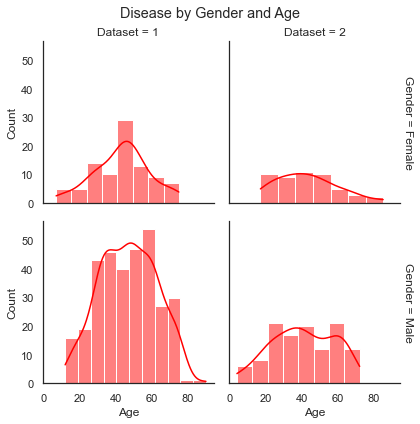

In [49]:
g = sns.FacetGrid(liver, col="Dataset", row="Gender", margin_titles=True)
g.map(sns.histplot, "Age", color="red", kde = True)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

In [31]:
liver.dropna(inplace=True)

In [23]:
liver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    object 
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Proteins              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


## Standardization/Normalization

In [34]:
#liver_std = liver
#liver_std.iloc[:, ~liver_std.columns.isin(['Gender', 'Dataset', 'Albumin_and_Globulin_Ratio'])] = (liver_std-liver_std.mean())/liver_std.std()
#liver_std.head()

C:\Users\simon\AppData\Local\Temp/ipykernel_19880/3796306063.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  liver_std.iloc[:, ~liver_std.columns.isin(['Gender', 'Dataset', 'Albumin_and_Globulin_Ratio'])] = (liver_std-liver_std.mean())/liver_std.std()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,1.251023,Female,-0.147262,0.198798,NaN,NaN,-0.318120,-0.633051,-0.493540,NaN,1
1,1.065722,Male,-0.647901,0.073094,NaN,NaN,-0.034303,-0.633051,1.429196,NaN,1
2,1.065722,Male,-0.178552,0.198798,NaN,NaN,-0.145061,-0.633051,0.930709,NaN,1
3,0.818653,Male,0.165636,0.324502,NaN,NaN,-0.311198,-0.633051,-0.386721,NaN,1
4,1.683393,Male,-1.711757,-0.932539,NaN,NaN,-0.176212,-0.633051,0.182978,NaN,1


In [43]:
liver_nrm = liver.iloc[:, ~liver.columns.isin(['Gender', 'Dataset'])]
liver_nrm.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.251023,-0.147262,0.198798,NaN,NaN,-0.318120,-0.633051,-0.493540,NaN
1,1.065722,-0.647901,0.073094,NaN,NaN,-0.034303,-0.633051,1.429196,NaN
2,1.065722,-0.178552,0.198798,NaN,NaN,-0.145061,-0.633051,0.930709,NaN
3,0.818653,0.165636,0.324502,NaN,NaN,-0.311198,-0.633051,-0.386721,NaN
4,1.683393,-1.711757,-0.932539,NaN,NaN,-0.176212,-0.633051,0.182978,NaN


### Matrice di correlazione

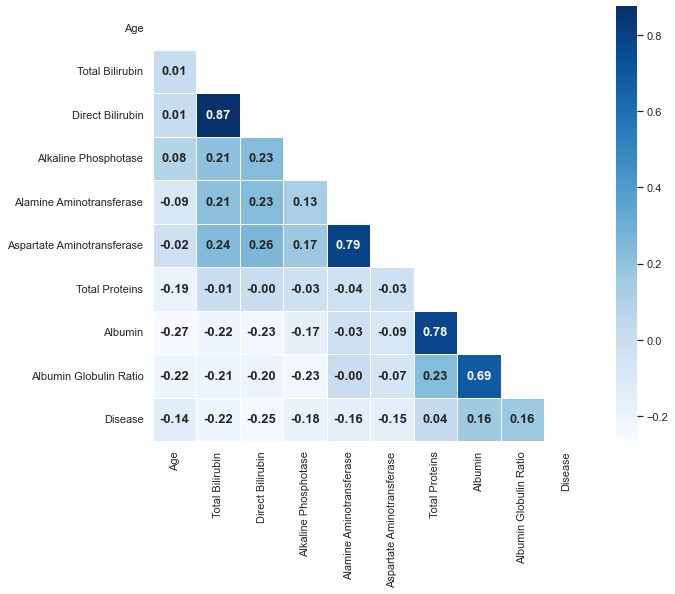

In [50]:
corrmatrix=liver.corr()

labels = ['Age', 'Total Bilirubin', 'Direct Bilirubin',
          'Alkaline Phosphotase', 'Alamine Aminotransferase',
          'Aspartate Aminotransferase', 'Total Proteins', 
         'Albumin', 'Albumin Globulin Ratio', 'Disease']

mask = np.triu(np.ones_like(corrmatrix, dtype=bool))


sns.set_theme(style="white")


plt.figure(figsize=(10,8))

g=sns.heatmap(corrmatrix, annot=True, fmt='.2f',
            cmap='Blues', yticklabels=labels, xticklabels=labels, linewidth = 1,
           mask=mask, square = True, annot_kws={
               'fontweight':'bold', 'fontsize': 13
           });

plt.savefig('Correlation_matrix.jpg', dpi = 80, bbox_inches = 'tight')
